In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPool1D, ReLU, Flatten, BatchNormalization

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score

In [3]:
samples_per_class = 5000
no_of_classes = 3
directory = "/content/gdrive/MyDrive/GW_SOP/Code/debugging/1D-CNN Multi-level/Signal_HIDDEN_in_strain_data/White_noise/Test 5/data/"

In [4]:
noise_df = pd.read_csv(directory + "Final_Merged_Noise_Reduced_No_Abs.csv", header=None)
noise = noise_df.values.astype(float)

data_BBH_df = pd.read_csv(directory + "Final_BBH_Merged_Noise_Signal.csv", header=None)
data_BBH = data_BBH_df.values.astype(float)

data_BNS_df = pd.read_csv(directory + "Final_BNS_Merged_Noise_Signal.csv", header=None)
data_BNS = data_BNS_df.values.astype(float)

In [5]:
X = np.concatenate((noise, data_BBH, data_BNS), axis=0)
print(X.shape)

(15000, 16384)


In [6]:
noise = None
noise_df = None

In [7]:
X1 = np.concatenate((data_BBH, data_BNS), axis=0)
print(X1.shape)

(10000, 16384)


In [8]:
data_BBH = None
data_BNS = None
data_BBH_df = None
data_BNS_df = None

In [9]:
y = [0 for i in range(5000)] + [1 for i in range(10000)]
y1 = [0 for i in range(5000)] + [1 for i in range(5000)] 

y = tf.keras.utils.to_categorical(y)
y1 = tf.keras.utils.to_categorical(y1)
print(y)
print(y1)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [10]:
X *= 1e19
X1 *= 1e19

print(X)
print(X1)

[[  8.65473393  -4.32729419  -3.26525906 ...   0.83292354  -3.52991081
   -7.59845202]
 [  3.87703089  -5.71315878  10.08591533 ...  10.26368544  17.05250296
    0.23558046]
 [  4.72886208  13.64311238  -9.2637261  ... -11.81785379 -14.40443602
   -7.49923767]
 ...
 [ -1.3682779    3.32131249  -1.45307157 ...  -3.26014527  14.0182199
    2.99613838]
 [  3.97594363  -5.79762639   1.94107332 ...  -0.38252231  12.78447127
    3.8614071 ]
 [-17.35933092   2.04440358  -9.3067805  ...   0.53713142  -5.9852591
    1.00235778]]
[[  6.05327494 -11.44179437   1.42285591 ...  11.57394988  -8.75094291
   -1.29104887]
 [  1.91975345  -6.7081553   -8.86090063 ...   0.98500265  -9.60227719
    1.35011481]
 [  0.34545884   7.40188999   4.37775549 ...  12.2019443    6.67455099
  -10.10748794]
 ...
 [ -1.3682779    3.32131249  -1.45307157 ...  -3.26014527  14.0182199
    2.99613838]
 [  3.97594363  -5.79762639   1.94107332 ...  -0.38252231  12.78447127
    3.8614071 ]
 [-17.35933092   2.04440358  -9.306

In [11]:
X = np.expand_dims(X, axis=-1)
X1 = np.expand_dims(X1, axis=-1)

print(X.shape)
print(X1.shape)

(15000, 16384, 1)
(10000, 16384, 1)


# Level 1

In [12]:
X_train, X2, y_train, y2 = train_test_split(X, y, test_size=0.2)

X_val, X_test, y_val, y_test = train_test_split(X2, y2, test_size=0.5)

print(X_train.shape, y_train.shape)

(12000, 16384, 1) (12000, 2)


In [13]:
X = None
y = None

X2 = None
y2 = None

In [17]:
model1 = Sequential()

model1.add(Conv1D(16, 16, input_shape = (16384,1)))
model1.add(MaxPool1D(4, 4))
model1.add(ReLU())
model1.add(Conv1D(32, 8))
model1.add(MaxPool1D(4, 4))
model1.add(ReLU())
model1.add(Conv1D(64, 8))
model1.add(MaxPool1D(4, 4))
model1.add(ReLU())
model1.add(Conv1D(128, 8))
model1.add(MaxPool1D(4, 4))
model1.add(ReLU())
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(2, activation='sigmoid'))

model1.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# model.summary()

In [19]:
history = model1.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
94/94 [==============================] - 11s 105ms/step - loss: 0.6354 - accuracy: 0.6658 - val_loss: 0.6424 - val_accuracy: 0.5260
Epoch 2/5
94/94 [==============================] - 9s 99ms/step - loss: 0.5188 - accuracy: 0.6823 - val_loss: 0.4669 - val_accuracy: 0.6987
Epoch 3/5
94/94 [==============================] - 9s 100ms/step - loss: 0.1593 - accuracy: 0.9144 - val_loss: 0.0122 - val_accuracy: 0.9980
Epoch 4/5
94/94 [==============================] - 9s 100ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9987
Epoch 5/5
94/94 [==============================] - 9s 101ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9993


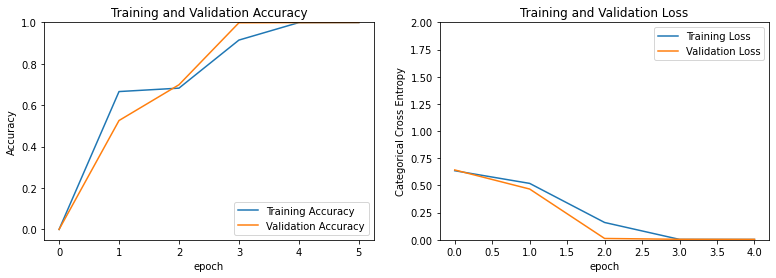

In [20]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,2])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig(directory[:-5]+"screenshots/graph_1_level_1.png")
plt.show()

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000


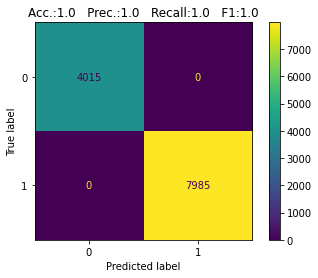

In [21]:
# Training Data

pred = model1.predict(X_train)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_train, axis = 1)

accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_true, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Acc.:'+str(round(accuracy, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/train_cm_1_level_1.png")
plt.show()

Accuracy: 0.999
Precision: 1.000
Recall: 0.999
F1-Score: 1.000


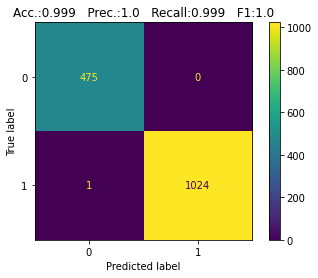

In [22]:
# Validation Data

pred = model1.predict(X_val)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_val, axis = 1)

accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_true, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Acc.:'+str(round(accuracy, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/val_cm_1_level_1.png")
plt.show()

Accuracy: 0.999
Precision: 0.999
Recall: 1.000
F1-Score: 0.999


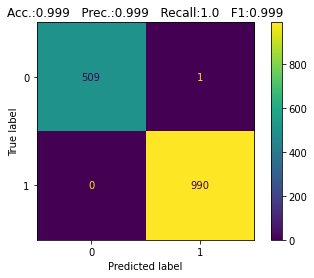

In [23]:
# Testing Data

pred = model1.predict(X_test)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_true, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Acc.:'+str(round(accuracy, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/test_cm_1_level_1.png")
plt.show()

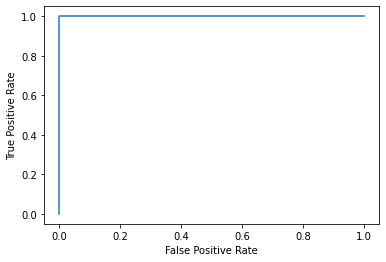

In [24]:
# ROC for validation data

pred = model1.predict(X_val)
y_true = np.argmax(y_val, axis = 1)
pos_probs = pred[:,1]
fpr, tpr, _ = roc_curve(y_true, pos_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig(directory[:-5]+"screenshots/val_roc_1_level_1.png")
plt.show()

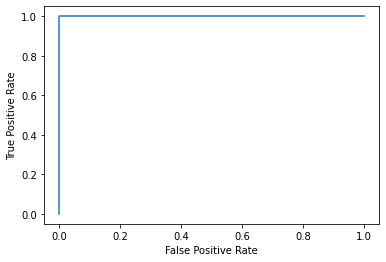

In [25]:
# ROC for testing data

pred = model1.predict(X_test)
y_true = np.argmax(y_test, axis = 1)
pos_probs = pred[:,1]
fpr, tpr, _ = roc_curve(y_true, pos_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig(directory[:-5]+"screenshots/test_roc_1_level_1.png")
plt.show()

In [26]:
# model1.save(directory + "model_trial_1_level_1.h5")

In [27]:
model1 = None
X_train = None
y_train = None
X_test = None
y_test = None

# Level 2

In [28]:
X_train, X2, y_train, y2 = train_test_split(X1, y1, test_size=0.2)

X_val, X_test, y_val, y_test = train_test_split(X2, y2, test_size=0.5)

print(X_train.shape, y_train.shape)

(8000, 16384, 1) (8000, 2)


In [29]:
X1 = None
y1 = None

X2 = None
y2 = None

In [30]:
model2 = Sequential()

model2.add(Conv1D(16, 16, input_shape = (16384,1)))
model2.add(MaxPool1D(4, 4))
model2.add(ReLU())
model2.add(Conv1D(32, 8))
model2.add(MaxPool1D(4, 4))
model2.add(ReLU())
model2.add(Conv1D(64, 8))
model2.add(MaxPool1D(4, 4))
model2.add(ReLU())
model2.add(Conv1D(128, 8))
model2.add(MaxPool1D(4, 4))
model2.add(ReLU())
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(2, activation='sigmoid'))

model2.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# model.summary()

In [32]:
history = model2.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
63/63 [==============================] - 9s 125ms/step - loss: 0.9390 - accuracy: 0.5029 - val_loss: 0.6925 - val_accuracy: 0.5270
Epoch 2/5
63/63 [==============================] - 7s 106ms/step - loss: 0.6891 - accuracy: 0.5610 - val_loss: 0.6804 - val_accuracy: 0.5250
Epoch 3/5
63/63 [==============================] - 6s 101ms/step - loss: 0.5476 - accuracy: 0.7731 - val_loss: 0.1925 - val_accuracy: 0.9440
Epoch 4/5
63/63 [==============================] - 6s 100ms/step - loss: 0.0651 - accuracy: 0.9824 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/5
63/63 [==============================] - 6s 100ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 6.5940e-04 - val_accuracy: 1.0000


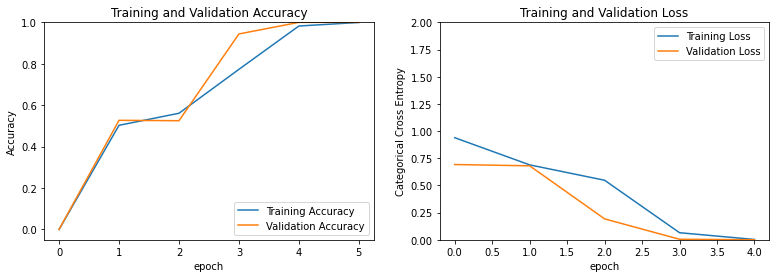

In [33]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,2])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig(directory[:-5]+"screenshots/graph_1_level_2.png")
plt.show()

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000


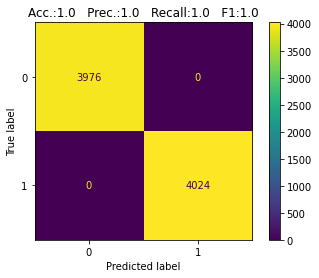

In [34]:
# Training Data

pred = model2.predict(X_train)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_train, axis = 1)

accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_true, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Acc.:'+str(round(accuracy, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/train_cm_1_level_2.png")
plt.show()

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000


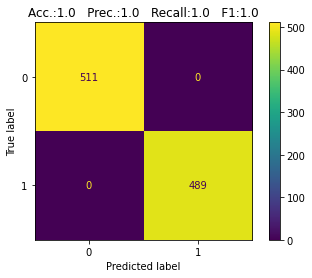

In [35]:
# Validation Data

pred = model2.predict(X_val)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_val, axis = 1)

accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_true, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Acc.:'+str(round(accuracy, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/val_cm_1_level_2.png")
plt.show()

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000


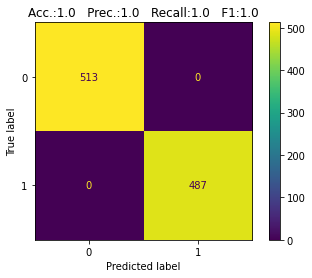

In [36]:
# Testing Data

pred = model2.predict(X_test)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_true, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Acc.:'+str(round(accuracy, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/test_cm_1_level_2.png")
plt.show()

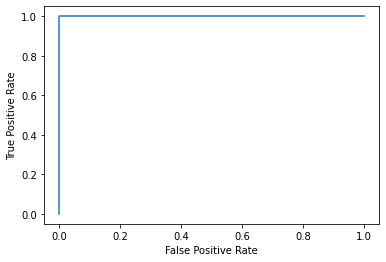

In [37]:
# ROC for validation data

pred = model2.predict(X_val)
y_true = np.argmax(y_val, axis = 1)
pos_probs = pred[:,1]
fpr, tpr, _ = roc_curve(y_true, pos_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig(directory[:-5]+"screenshots/val_roc_1_level_2.png")
plt.show()

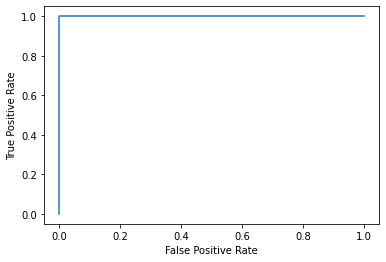

In [38]:
# ROC for testing data

pred = model2.predict(X_test)
y_true = np.argmax(y_test, axis = 1)
pos_probs = pred[:,1]
fpr, tpr, _ = roc_curve(y_true, pos_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig(directory[:-5]+"screenshots/test_roc_1_level_2.png")
plt.show()

In [39]:
# model2.save(directory + "model_trial_1_level_2.h5")